In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
df = pd.read_csv("/Users/rutwijdaptardar/telco.csv")
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [3]:
df = df.drop(["phone number","area code","state","international plan","voice mail plan"], axis=1)
features = df.drop(["churn"], axis=1).columns


In [4]:
df_train, df_test = train_test_split(df, test_size=0.30)

In [5]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(df_train[features], df_train["churn"])
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [6]:
score = clf.score(df_test[features], df_test["churn"])
print("Accuracy: ", score)

Accuracy:  0.898


In [7]:
get_ipython().magic('matplotlib inline')
c=confusion_matrix(df_test["churn"], predictions)
confusion_matrix = pd.DataFrame(
    c, 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)


,Predicted False,Predicted True
Actual False,833,22
Actual True,80,65


,importance,labels
4,0.154318,total day charge
2,0.153101,total day minutes
14,0.124139,customer service calls
5,0.077200,total eve minutes
7,0.072737,total eve charge


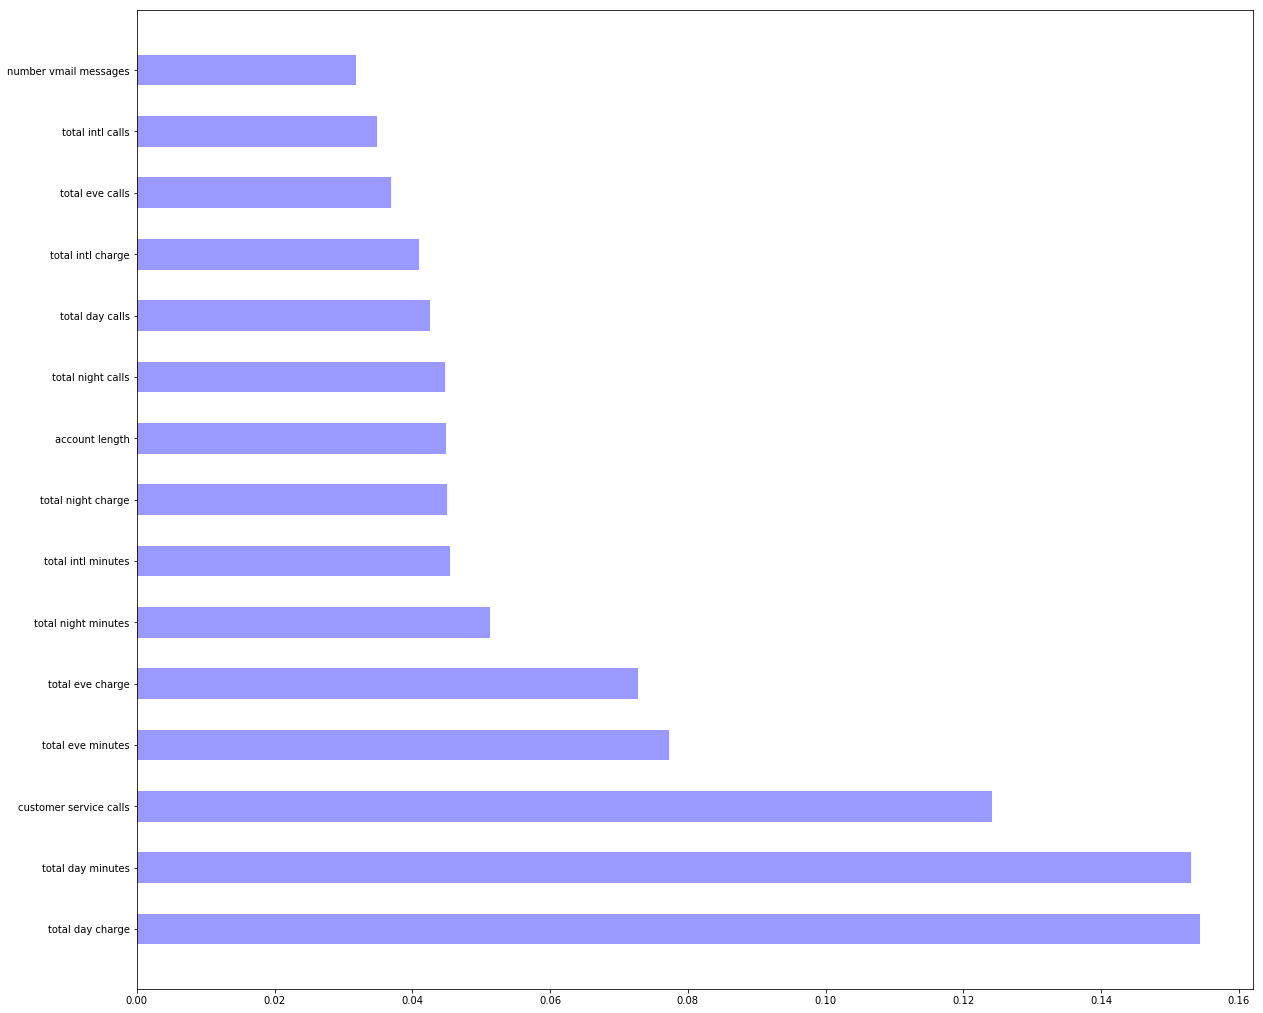

In [8]:
import numpy as np
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

/Users/rutwijdaptardar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,prob_true
3243,0.933333
3132,0.933333
3272,1.000000
2325,0.933333
978,0.933333


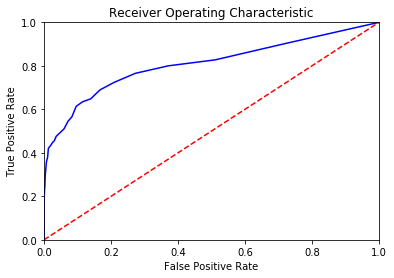

In [9]:
df_test["prob_true"] = probs[:, 1]
df_risky = df_test[df_test["prob_true"] > 0.9]
display(df_risky.head(5)[["prob_true"]])
fpr, tpr, threshold = roc_curve(df_test["churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
df = df.drop(["total intl calls","number vmail messages","total intl charge","total eve calls","total intl minutes","total night minutes"], axis=1)
features = df.drop(["churn"], axis=1).columns


In [11]:
df_train, df_test = train_test_split(df, test_size=0.30)

In [12]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(df_train[features], df_train["churn"])
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [13]:
score = clf.score(df_test[features], df_test["churn"])
print("Accuracy: ", score)

Accuracy:  0.906


,importance,labels
1,0.176166,total day minutes
3,0.162779,total day charge
8,0.135370,customer service calls
5,0.114398,total eve charge
4,0.110544,total eve minutes


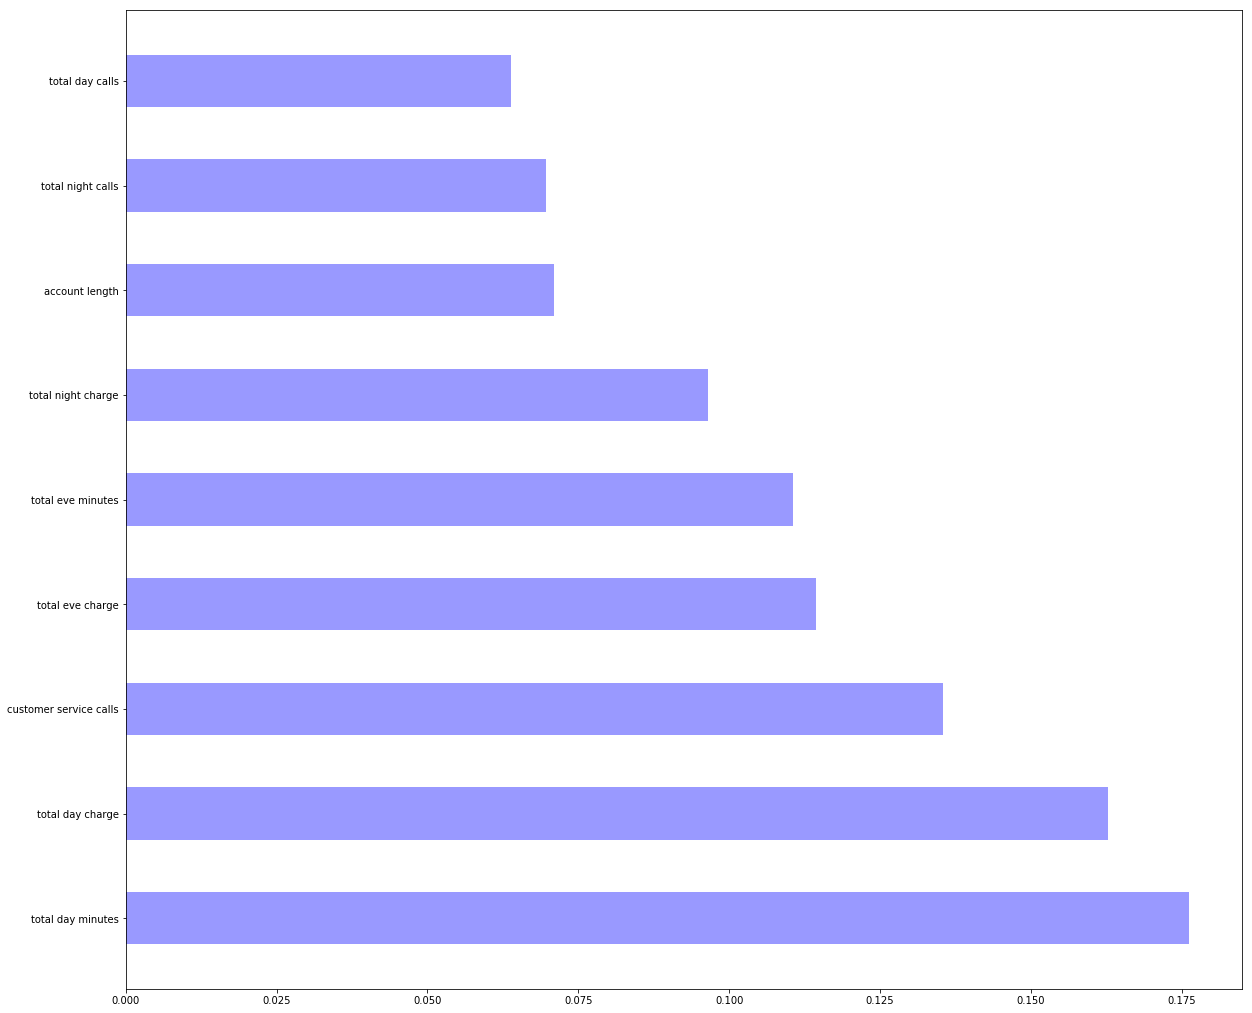

In [14]:
import numpy as np
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

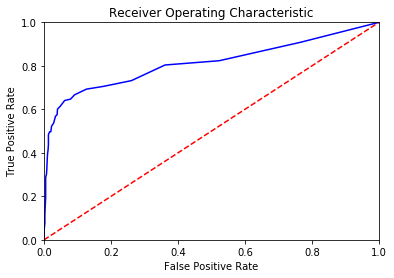

In [15]:
fpr, tpr, threshold = roc_curve(df_test["churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
 from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(df_train[features], df_train["churn"])
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [18]:
score = clf.score(df_test[features], df_test["churn"])
print("Accuracy: ", score)

Accuracy:  0.871


In [20]:
get_ipython().magic('matplotlib inline')
c=confusion_matrix(df_test["churn"], predictions)
confusion_matrix = pd.DataFrame(
    c, 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

TypeError: 'DataFrame' object is not callable

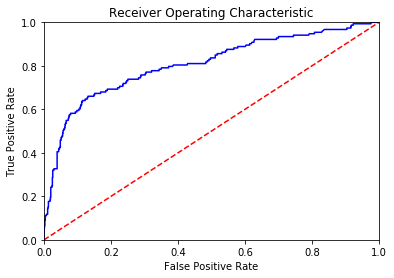

In [21]:
fpr, tpr, threshold = roc_curve(df_test["churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

,importance,labels
3,0.405294,total day charge
8,0.382778,customer service calls
5,0.071499,total eve charge
1,0.038023,total day minutes
7,0.032674,total night charge


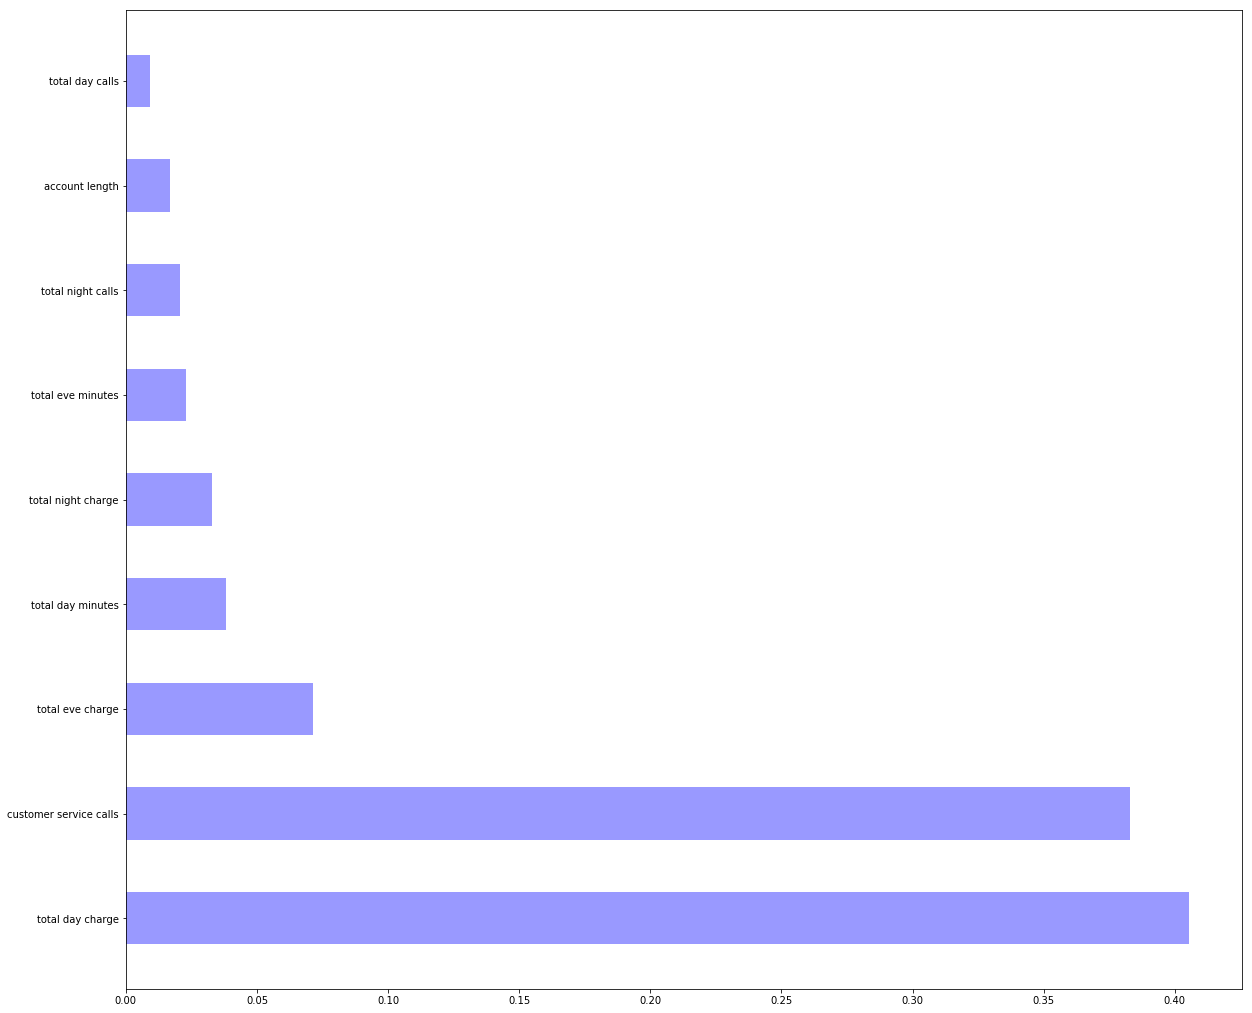

In [22]:
import numpy as np
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [23]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(df_train[features], df_train["churn"])
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)  

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
score = clf.score(df_test[features], df_test["churn"])
print("Accuracy: ", score)

Accuracy:  0.894


In [26]:
get_ipython().magic('matplotlib inline')
c=confusion_matrix(df_test["churn"], predictions)
confusion_matrix = pd.DataFrame(
    c, 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

TypeError: 'DataFrame' object is not callable

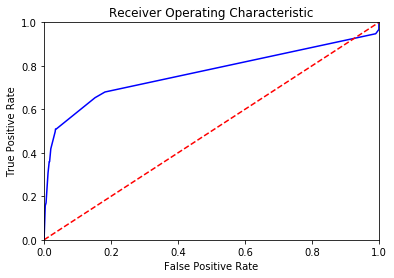

In [24]:
fpr, tpr, threshold = roc_curve(df_test["churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

,importance,labels
1,0.386942,total day minutes
5,0.250008,total eve charge
8,0.239713,customer service calls
3,0.056880,total day charge
7,0.039609,total night charge


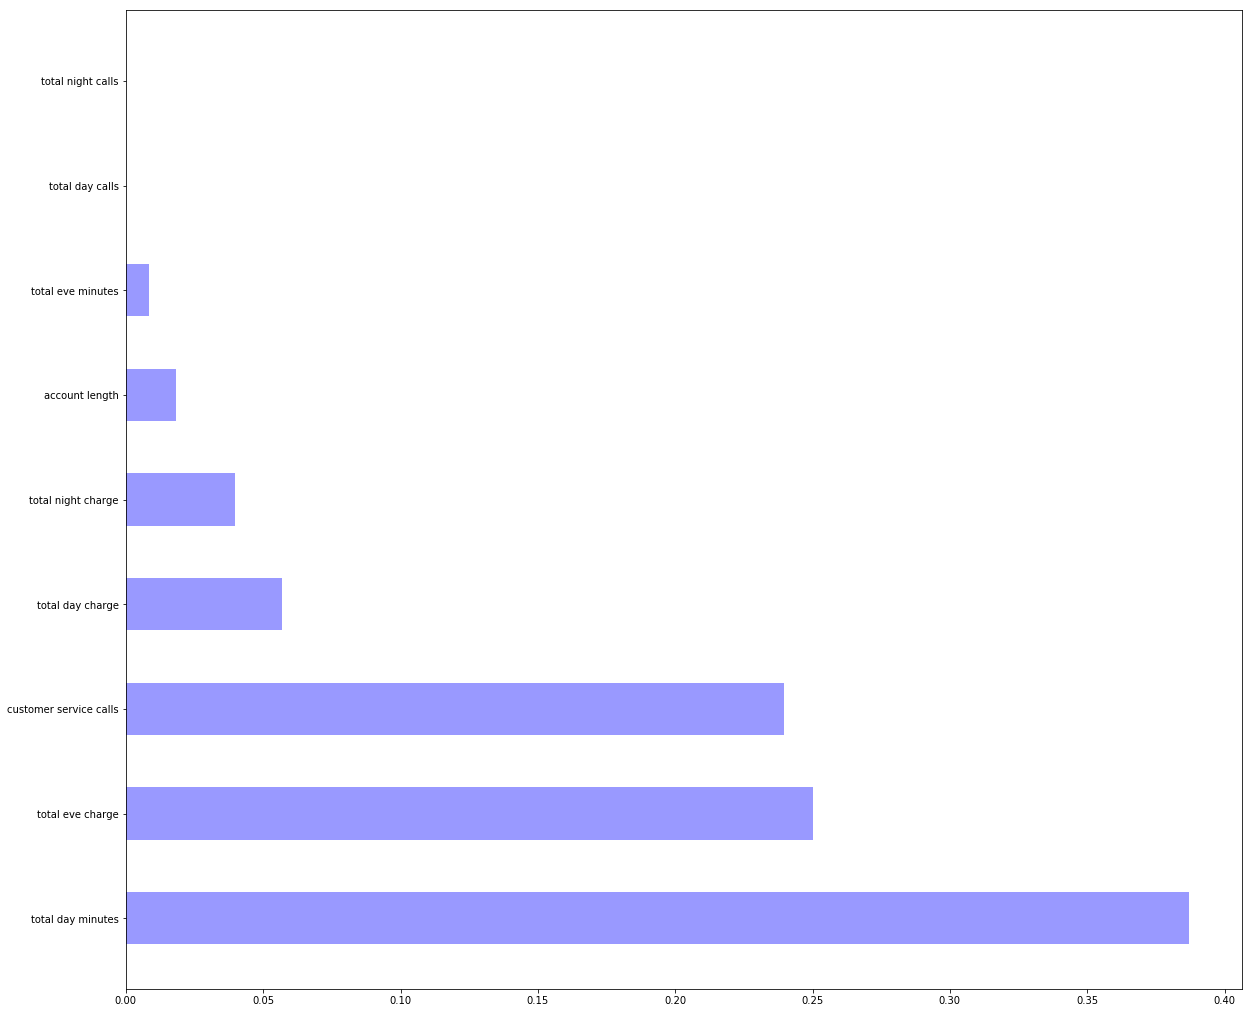

In [25]:
import numpy as np
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [30]:
#from sklearn.metrics import classification_report
#print(classification_report(df_test, predictions))
#from sklearn.metrics import precision_recall_fscore_support
#precision_recall_fscore_support(df_test, predictions, average='macro')

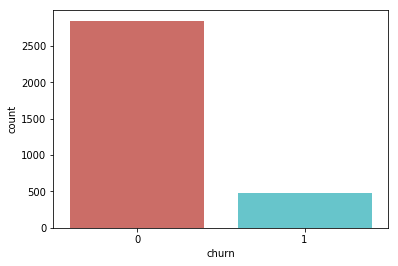

In [31]:
import seaborn as sb
sb.countplot(x='churn',data=df,palette='hls')

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
x=scale(df)
y = df.ix[:,9].values
logreg=LogisticRegression()
logreg.fit(x,y)
print(logreg.score(x,y))
y_pred=logreg.predict(x)
#from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2850
           1       1.00      1.00      1.00       483

   micro avg       1.00      1.00      1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



/Users/rutwijdaptardar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rutwijdaptardar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/rutwijdaptardar/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
